# Microbiota network construction and plotting

## Salmo salar mucosal tissue microbiota across functional feed treatments

#### Load libraries

In [ ]:
set.seed(123)
library('dplyr'); packageVersion('dplyr')
library('Matrix'); packageVersion('Matrix')
library('intergraph');packageVersion('intergraph')
library('GGally');packageVersion('GGally')
library('ggnet');packageVersion('ggnet')
library('ggnetwork');packageVersion('ggnetwork')
library('sna');packageVersion('sna')
library('network');packageVersion('network')
library('ggpubr');packageVersion('ggpubr')
library('igraph');packageVersion('igraph')
library('seqtime'); packageVersion('seqtime')
library('SpiecEasi'); packageVersion('SpiecEasi')
library('phyloseq'); packageVersion('phyloseq')
library('RColorBrewer');packageVersion('RColorBrewer')
library('CINNA');packageVersion('CINNA')
#library('');packageVersion('')

#### Parse data into tissue specific datasets

In [3]:
psFish1f <- readRDS('psFish1f.RDS')
psFish1f

psGut <- prune_samples(sample_data(psFish1f)$Tissue %in% c('Gut'), psFish1f)
psGut

psGill <- prune_samples(sample_data(psFish1f)$Tissue %in% c('Gill'), psFish1f)
psGill

psSkin <- prune_samples(sample_data(psFish1f)$Tissue %in% c('Skin'), psFish1f)
psSkin

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 209 samples ]
sample_data() Sample Data:       [ 209 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 69 samples ]
sample_data() Sample Data:       [ 69 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2378 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 2378 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 2378 tips and 2377 internal nodes ]
refseq()      DNAStringSet:      [ 2378 reference sequences ]

#### Filter out spurious ASVs from each dataset (0.0001% abundance)

In [4]:
psFishR = transform_sample_counts(psFish1f, function(x) x / sum(x))
#psGutR
psFishRF = filter_taxa(psFishR, function(x) mean(x)  > 0.0001, TRUE)
#psGutRF                      
psFishF <- prune_taxa(taxa_names(psFishRF), psFish1f)
psFishF

psGutR = transform_sample_counts(psGut, function(x) x / sum(x))
#psGutR
psGutRF = filter_taxa(psGutR, function(x) mean(x)  > 0.0001, TRUE)
#psGutRF                      
psGutF <- prune_taxa(taxa_names(psGutRF), psGut)
psGutF
                      
psGillR = transform_sample_counts(psGill, function(x) x / sum(x))
#psGillR
psGillRF = filter_taxa(psGillR, function(x) mean(x)  > 0.0001, TRUE)
#psGillRF                      
psGillF <- prune_taxa(taxa_names(psGillRF), psGill)
psGillF 
                       
psSkinR = transform_sample_counts(psSkin, function(x) x / sum(x))
#psSkinR
psSkinRF = filter_taxa(psSkinR, function(x) mean(x)  > 0.0001, TRUE)
#psSkinRF                      
psSkinF <- prune_taxa(taxa_names(psSkinRF), psSkin)
psSkinF     

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 898 taxa and 209 samples ]
sample_data() Sample Data:       [ 209 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 898 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 898 tips and 897 internal nodes ]
refseq()      DNAStringSet:      [ 898 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 281 taxa and 68 samples ]
sample_data() Sample Data:       [ 68 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 281 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 281 tips and 280 internal nodes ]
refseq()      DNAStringSet:      [ 281 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1009 taxa and 69 samples ]
sample_data() Sample Data:       [ 69 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 1009 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1009 tips and 1008 internal nodes ]
refseq()      DNAStringSet:      [ 1009 reference sequences ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 888 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 5 sample variables ]
tax_table()   Taxonomy Table:    [ 888 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 888 tips and 887 internal nodes ]
refseq()      DNAStringSet:      [ 888 reference sequences ]

## Construct/infer networks from each data set

In [5]:
se.mb.Fish <- spiec.easi(psFishF, 
                         method = 'mb',
                         lambda.min.ratio = 1e-2,
                         nlambda = 20,
                         pulsar.params = list(rep.num = 99, 
                                              seed = 123, 
                                              ncores = 2)) 
getStability(se.mb.Fish)
sum(getRefit(se.mb.Fish))/2

ig.mbFish <- adj2igraph(getRefit(se.mb.Fish),
                        vertex.attr = list(name = taxa_names(psFishF)))

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] 0.04523746

[1] 5961

In [6]:
saveRDS(se.mb.Fish, 'networks/se.mb.Fish')
saveRDS(ig.mbFish, 'networks/ig.mbFish')

In [7]:
se.mb.Gut <- spiec.easi(psGutF, 
                        method = 'mb',
                        lambda.min.ratio = 1e-2,
                        nlambda = 20,
                        pulsar.params = list(rep.num = 99, 
                                             seed = 123, 
                                             ncores = 2)) 

getStability(se.mb.Gut)
sum(getRefit(se.mb.Gut))/2

ig.mbGut <- adj2igraph(getRefit(se.mb.Gut),
                       vertex.attr = list(name = taxa_names(psGutF)))

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] 0.04428555

[1] 614

In [8]:
saveRDS(se.mb.Gut, 'networks/se.mb.Gut')
saveRDS(ig.mbGut, 'networks/ig.mbGut')

In [9]:
se.mb.Gill <- spiec.easi(psGillF, 
                         method = 'mb',
                         lambda.min.ratio = 1e-2,
                         nlambda = 20,
                         pulsar.params = list(rep.num = 99, 
                                              seed = 123, 
                                              ncores = 2)) 

getStability(se.mb.Gill)
sum(getRefit(se.mb.Gill))/2

ig.mbGill <- adj2igraph(getRefit(se.mb.Gill),
                        vertex.attr = list(name = taxa_names(psGillF)))

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] 0.04083343

[1] 9973

In [10]:
saveRDS(se.mb.Gill, 'networks/se.mb.Gill')
saveRDS(ig.mbGill, 'networks/ig.mbGill')

In [11]:
se.mb.Skin <- spiec.easi(psSkinF, 
                         method = 'mb',
                         lambda.min.ratio = 1e-2,
                         nlambda = 20,
                         pulsar.params = list(rep.num = 99, 
                                              seed = 123, 
                                              ncores = 2)) 

getStability(se.mb.Skin)
sum(getRefit(se.mb.Skin))/2

ig.mbSkin <- adj2igraph(getRefit(se.mb.Skin),
                        vertex.attr = list(name = taxa_names(psSkinF)))

Applying data transformations...

Selecting model with pulsar using stars...

Fitting final estimate with mb...

done



[1] 0.04142025

[1] 7904

In [12]:
saveRDS(se.mb.Skin, 'networks/se.mb.Skin')
saveRDS(ig.mbSkin, 'networks/ig.mbSkin')

In [13]:
elist.mbFish <- summary(symBeta(getOptBeta(se.mb.Fish), mode='maxabs'))
pdf('networks/AllTissue_edgeweigths.pdf')
hist(elist.mbFish[,3], main='All Tissues', xlab='edge weights')
dev.off()
dd.mbFish <- degree.distribution(ig.mbFish)
pdf('networks/AllTissue_degreefreq.pdf')
plot(0:(length(dd.mbFish)-1), dd.mbFish , ylim=c(0,.35), type='b',
       ylab="Frequency", xlab="Degree", main="All Tissue Degree Distributions")
dev.off()

elist.mbGut <- summary(symBeta(getOptBeta(se.mb.Gut), mode='maxabs'))
pdf('networks/Gut_edgeweigths.pdf')
hist(elist.mbGut[,3], main='Gut', xlab='edge weights')
dev.off()
dd.mbGut <- degree.distribution(ig.mbGut)
pdf('networks/Gut_degreefreq.pdf')
plot(0:(length(dd.mbGut)-1), dd.mbGut , ylim=c(0,.35), type='b',
      ylab="Frequency", xlab="Degree", main="Gut Degree Distributions")
dev.off()

elist.mbGill <- summary(symBeta(getOptBeta(se.mb.Gill), mode='maxabs'))
pdf('networks/Gill_edgeweigths.pdf')
hist(elist.mbGill[,3], main='Gill', xlab='edge weights')
dev.off()
dd.mbGill <- degree.distribution(ig.mbGill)
pdf('networks/Gill_degreefreq.pdf')
plot(0:(length(dd.mbGill)-1), dd.mbGill , ylim=c(0,.35), type='b',
       ylab="Frequency", xlab="Degree", main="Gill Degree Distributions")
dev.off()

elist.mbSkin <- summary(symBeta(getOptBeta(se.mb.Skin), mode='maxabs'))
pdf('networks/Skin_edgeweigths.pdf')
hist(elist.mbSkin[,3], main='Skin', xlab='edge weights')
dev.off()
dd.mbSkin <- degree.distribution(ig.mbSkin)
pdf('networks/Skin_degreefreq.pdf')
plot(0:(length(dd.mbSkin)-1), dd.mbSkin , ylim=c(0,.35), type='b',
       ylab="Frequency", xlab="Degree", main="Skin Degree Distributions")
dev.off()

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

pdf 
  2

In [14]:
pr_centFish <- proper_centralities(ig.mbFish)
cal_centFish <- calculate_centralities(ig.mbFish, include = pr_centFish[c(1,2,3,4,7,10,11,15,24,26,32,34,41,44,50)])

 [1] "subgraph centrality scores"                      
 [2] "Topological Coefficient"                         
 [3] "Average Distance"                                
 [4] "Barycenter Centrality"                           
 [5] "BottleNeck Centrality"                           
 [6] "Centroid value"                                  
 [7] "Closeness Centrality (Freeman)"                  
 [8] "ClusterRank"                                     
 [9] "Decay Centrality"                                
[10] "Degree Centrality"                               
[11] "Diffusion Degree"                                
[12] "DMNC - Density of Maximum Neighborhood Component"
[13] "Eccentricity Centrality"                         
[14] "Harary Centrality"                               
[15] "eigenvector centralities"                        
[16] "K-core Decomposition"                            
[17] "Geodesic K-Path Centrality"                      
[18] "Katz Centrality (Katz Status Index)"      

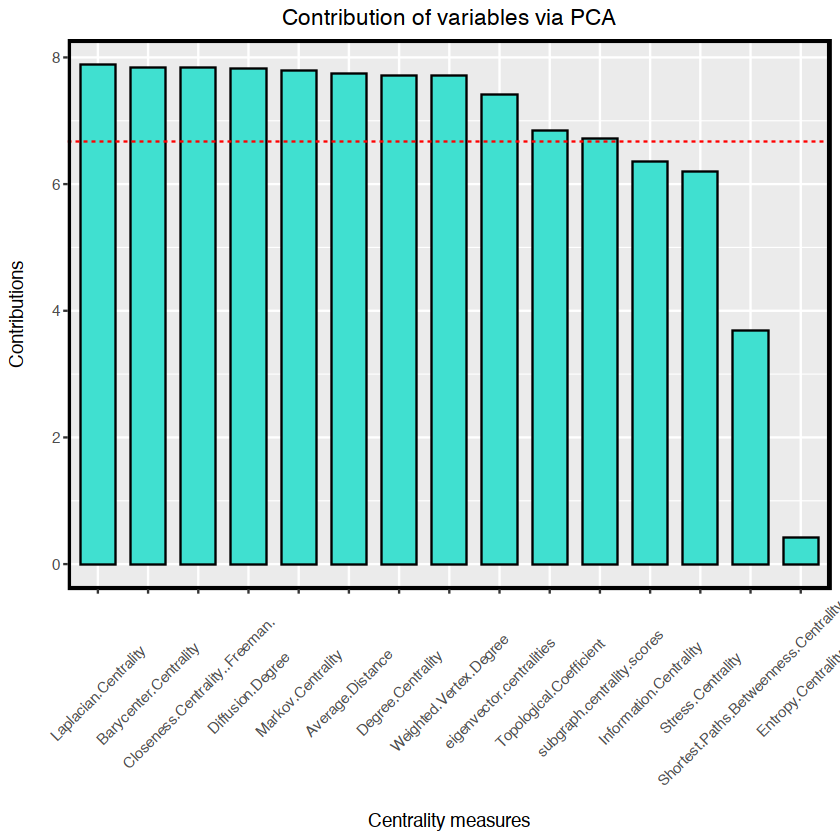

In [15]:
centPCAFish <- cal_centFish %>% pca_centralities(scale.unit = TRUE)
centPCAFish

In [21]:
pr_cent <- proper_centralities(ig.mbGut)

 [1] "subgraph centrality scores"                      
 [2] "Topological Coefficient"                         
 [3] "Average Distance"                                
 [4] "Barycenter Centrality"                           
 [5] "BottleNeck Centrality"                           
 [6] "Centroid value"                                  
 [7] "Closeness Centrality (Freeman)"                  
 [8] "ClusterRank"                                     
 [9] "Decay Centrality"                                
[10] "Degree Centrality"                               
[11] "Diffusion Degree"                                
[12] "DMNC - Density of Maximum Neighborhood Component"
[13] "Eccentricity Centrality"                         
[14] "Harary Centrality"                               
[15] "eigenvector centralities"                        
[16] "K-core Decomposition"                            
[17] "Geodesic K-Path Centrality"                      
[18] "Katz Centrality (Katz Status Index)"      

 [1] "subgraph centrality scores"                      
 [2] "Topological Coefficient"                         
 [3] "Average Distance"                                
 [4] "Barycenter Centrality"                           
 [5] "BottleNeck Centrality"                           
 [6] "Centroid value"                                  
 [7] "Closeness Centrality (Freeman)"                  
 [8] "ClusterRank"                                     
 [9] "Decay Centrality"                                
[10] "Degree Centrality"                               
[11] "Diffusion Degree"                                
[12] "DMNC - Density of Maximum Neighborhood Component"
[13] "Eccentricity Centrality"                         
[14] "Harary Centrality"                               
[15] "eigenvector centralities"                        
[16] "K-core Decomposition"                            
[17] "Geodesic K-Path Centrality"                      
[18] "Katz Centrality (Katz Status Index)"      

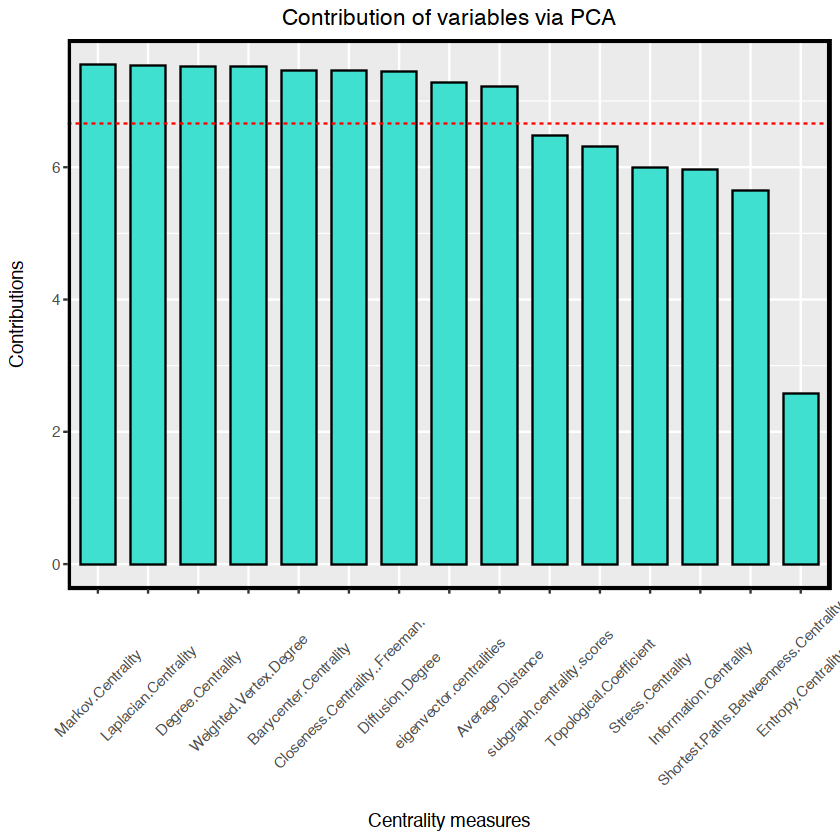

In [23]:
pr_centGill <- proper_centralities(ig.mbGill)
cal_centGill <- calculate_centralities(ig.mbGill, include = pr_centGill[c(1,2,3,4,7,10,11,15,24,26,32,34,41,44,50)])
centPCAGill <- cal_centGill %>% pca_centralities(scale.unit = TRUE)
centPCAGill

 [1] "subgraph centrality scores"                      
 [2] "Topological Coefficient"                         
 [3] "Average Distance"                                
 [4] "Barycenter Centrality"                           
 [5] "BottleNeck Centrality"                           
 [6] "Centroid value"                                  
 [7] "Closeness Centrality (Freeman)"                  
 [8] "ClusterRank"                                     
 [9] "Decay Centrality"                                
[10] "Degree Centrality"                               
[11] "Diffusion Degree"                                
[12] "DMNC - Density of Maximum Neighborhood Component"
[13] "Eccentricity Centrality"                         
[14] "Harary Centrality"                               
[15] "eigenvector centralities"                        
[16] "K-core Decomposition"                            
[17] "Geodesic K-Path Centrality"                      
[18] "Katz Centrality (Katz Status Index)"      

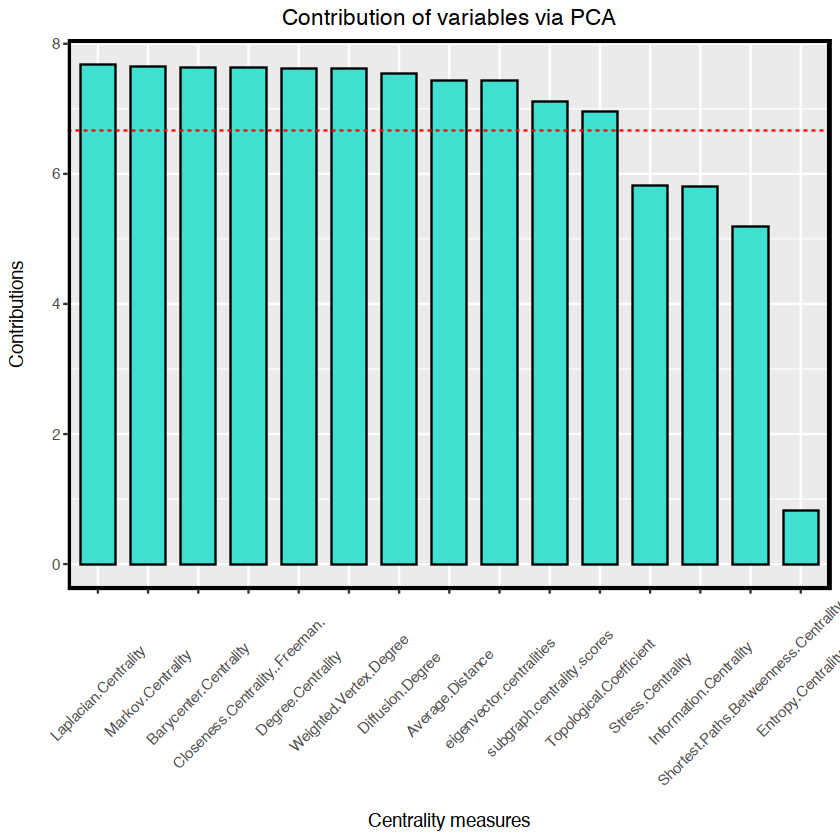

In [24]:
pr_centSkin <- proper_centralities(ig.mbSkin)
cal_centSkin <- calculate_centralities(ig.mbSkin, include = pr_centSkin[c(1,2,3,4,7,10,11,15,24,26,32,34,41,44,50)])
centPCASkin <- cal_centSkin %>% pca_centralities(scale.unit = TRUE)
centPCASkin

In [25]:
PhylumPalette <- scale_color_manual(values = c('Acidobacteria' = "#7FC97F", 
                                                'Actinobacteria' = "#BEAED4", 
                                                 'Bacteroidetes' = "#FDC086", 
                                                 'Chloroflexi' = "#FFFF99", 
                                                 'Deinococcus-Thermus' = "#FFFF99",
                                                 'Epsilonbacteraeota' = "#386CB0",
                                                 'Firmicutes' = "#F0027F",
                                                 'Gemmatimonadetes' = "#BF5B17", 
                                                 'Nitrospirae' = "#BF5B17", 
                                                 'Patescibacteria' = "#666666",
                                                 'Planctomycetes' = "#1B9E77",
                                                 'Proteobacteria' = "#A6761D",#"#D95F02",
                                                 'Tenericutes' = "#7570B3",
                                                 'Verrucomicrobia' = "#E7298A"))

#"#FFFF99","#BF5B17","#666666","#66A61E","#E6AB02",,"#666666"
#psFishFtaxa <- subset_taxa(psFishF, Phylum %in% phyList)
#psFishFtaxa

In [26]:
print('All')
btFish <- betweenness(ig.mbFish)
cor(degree(ig.mbFish), btFish)

print('Gut')
btGut <- betweenness(ig.mbGut)
cor(degree(ig.mbGut), btGut)

print('Gill')
btGill <- betweenness(ig.mbGill)
cor(degree(ig.mbGill), btGill)

print('Skin')
btSkin <- betweenness(ig.mbSkin)
cor(degree(ig.mbSkin), btSkin)

[1] "All"


[1] 0.681054

[1] "Gut"


[1] 0.787452

[1] "Gill"


[1] 0.8114626

[1] "Skin"


[1] 0.6694189

In [27]:
print('All')
scFish <- subgraph_centrality(ig.mbFish)
cor(degree(ig.mbFish), scFish)
#degree(ig.mbFish)
#scFish

print('Gut')
scGut <- subgraph_centrality(ig.mbGut)
cor(degree(ig.mbGut), scGut)
#degree(ig.mbFish)
#scGut

print('Gill')
scGill <- subgraph_centrality(ig.mbGill)
cor(degree(ig.mbGill), scGill)
#degree(ig.mbFish)
#scGill

print('Skin')
scSkin <- subgraph_centrality(ig.mbSkin)
cor(degree(ig.mbSkin), scSkin)
#degree(ig.mbFish)
#scSkin

[1] "All"


[1] 0.6563026

[1] "Gut"


[1] 0.7664445

[1] "Gill"


[1] 0.8782675

[1] "Skin"


[1] 0.8995967

In [28]:
skinBT <- data.frame(slice_max(as.data.frame(btSkin), btSkin, n=3), Tissue = 'Skin')
skinBT$taxa <- tax_table(psSkin)[row.names(skinBT)]
skinBT

gillBT <- data.frame(slice_max(as.data.frame(btGill), btGill, n=3), Tissue = 'Gill')
gillBT$taxa <- tax_table(psGill)[row.names(gillBT)]
gillBT 

gutBT <- data.frame(slice_max(as.data.frame(btGut), btGut, n=3), Tissue = 'Gut')
gutBT$taxa <- tax_table(psGut)[row.names(gutBT)]
gutBT

fishSC <- data.frame(slice_max(as.data.frame(scFish), scFish, n=3), Tissue = 'Fish')
fishSC$taxa <- tax_table(psFish1f)[row.names(fishSC)]
fishSC

,btSkin,Tissue,taxa
,<dbl>,<chr>,"<txnmyTbl[,7]>"
ASV3,18025.328,Skin,"Bacteria, Proteobacteria, Gammaproteobacteria, Enterobacteriales, Enterobacteriaceae, Escherichia/Shigella, NA"
ASV52,7407.905,Skin,"Bacteria, Proteobacteria, Gammaproteobacteria, Alteromonadales , Marinobacteraceae , Marinobacter , NA"
ASV39,6719.545,Skin,"Bacteria, Bacteroidetes , Rhodothermia , Balneolales , Balneolaceae , Aliifodinibius , NA"


,btGill,Tissue,taxa
,<dbl>,<chr>,"<txnmyTbl[,7]>"
ASV3,11570.589,Gill,"Bacteria, Proteobacteria, Gammaproteobacteria, Enterobacteriales, Enterobacteriaceae, Escherichia/Shigella, NA"
ASV928,4511.302,Gill,"Bacteria, Planctomycetes, Phycisphaerae , Phycisphaerales , Phycisphaeraceae , NA , NA"
ASV1330,4240.312,Gill,"Bacteria, Actinobacteria, Actinobacteria , Micrococcales , Brevibacteriaceae , Brevibacterium , NA"


,btGut,Tissue,taxa
,<dbl>,<chr>,"<txnmyTbl[,7]>"
ASV664,2929.600,Gut,"Bacteria, Bacteroidetes , Bacteroidia , Sphingobacteriales , Sphingobacteriaceae , Sphingobacterium, NA"
ASV105,2415.240,Gut,"Bacteria, Proteobacteria, Alphaproteobacteria, Caulobacterales , Caulobacteraceae , Brevundimonas , NA"
ASV231,2302.139,Gut,"Bacteria, Actinobacteria, Actinobacteria , Propionibacteriales, Propionibacteriaceae, Cutibacterium , NA"


,scFish,Tissue,taxa
,<dbl>,<chr>,"<txnmyTbl[,7]>"
ASV23,363627.7,Fish,"Bacteria, Actinobacteria, Acidimicrobiia, Microtrichales , Microtrichaceae , Candidatus_Microthrix, NA"
ASV15,313037.3,Fish,"Bacteria, Bacteroidetes , Bacteroidia , Flavobacteriales, Flavobacteriaceae, NA , NA"
ASV19,281831.0,Fish,"Bacteria, Bacteroidetes , Bacteroidia , Flavobacteriales, Flavobacteriaceae, Polaribacter , NA"


### Use function from "https://github.com/zdk123/SpiecEasi/issues/54" to color edges

### Skin Network Plot

In [78]:
col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Skin)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Skin[[1]]$data)

edges=E(ig.mbSkin)
edge.colors=c()
edge.weight=c()
for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbSkin,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors=append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors=append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta neg:",beta,"\n")
    
    
  }
}

E(ig.mbSkin)$color=edge.colors
E(ig.mbSkin)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbSkin)
tax_table(psSkinF) <- tax_table(psSkinF)[,getrank]
otu_ids <- V(ig.mbSkin)$name
idx <- which(row.names(tax_table(psSkinF)) %in% otu_ids)
taxa <- as.character(tax_table(psSkinF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbSkin)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pSkin <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             #edge.label = "weight", 
             size = btSkin,
             size.min = 2175,
             edge.color="color",
             edge.size =0.7,
             #edge.alpha = 0.75,
             label = TRUE, 
             label.size = 1.5)
pSkin <- pSkin + guides(color = guide_legend(override.aes = list(size=5),
                                             title = "Phylum"),
                        size = FALSE) + PhylumPalette +  theme(legend.title = element_text(size=10),
                                                                                            legend.text = element_text(size=10))

Beta pos: 0.3903308 
Beta pos: 0.01314853 
Beta pos: 0.00998224 
Beta pos: 0.04982054 
Beta neg: -0.02318266 
Beta pos: 0.01273376 
Beta neg: -0.0878336 
Beta neg: -0.05297711 
Beta neg: -0.0578794 
Beta neg: -0.07856291 
Beta neg: -0.02686661 
Beta neg: -0.01882426 
Beta neg: -0.002419685 
Beta neg: -0.08509286 
Beta neg: -0.001468324 
Beta neg: -0.005484546 
Beta neg: -0.02352941 
Beta pos: 0.01272938 
Beta neg: -0.03394045 
Beta neg: -0.08777787 
Beta neg: -0.008015804 
Beta neg: -0.01757165 
Beta neg: -0.009635857 
Beta pos: 0.007451424 
Beta pos: 0.09456575 
Beta pos: 0.08334416 
Beta pos: 0.09916072 
Beta pos: 0.04389996 
Beta pos: 0.01299051 
Beta neg: -0.00309294 
Beta neg: -0.08101321 
Beta neg: -0.127449 
Beta neg: -0.01389692 
Beta neg: -0.06022892 
Beta neg: -0.01725947 
Beta neg: -0.0363691 
Beta neg: -0.008266578 
Beta neg: -0.06954188 
Beta neg: -0.1876629 
Beta neg: -0.03298258 
Beta neg: -0.08486369 
Beta neg: -0.1049725 
Beta neg: -0.1262332 
Beta neg: -0.02449666 
Be

size.min removed 838 nodes out of 888

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



### Gill network plot

In [69]:
#col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Gill)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Gill[[1]]$data)

edges=E(ig.mbGill)
edge.colors=c()
edge.weight=c()
for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbGill,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors=append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors=append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta neg:",beta,"\n")
    
    
  }
}

E(ig.mbGill)$color=edge.colors
E(ig.mbGill)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbGill)
tax_table(psGillF) <- tax_table(psGillF)[,getrank]
otu_ids <- V(ig.mbGill)$name
idx <- which(row.names(tax_table(psGillF)) %in% otu_ids)
taxa <- as.character(tax_table(psGillF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbGill)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pGill <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             #edge.label = "weight", 
             size = btGill,
             size.min = 2505,
             edge.color="color",
             edge.size=.7,    
             #edge.alpha = 0.75,
             label = TRUE, 
             label.size = 1.5)
pGill <- pGill + guides(color = guide_legend(override.aes = list(size=5),
                                             title = "Phylum"),
                        size = FALSE) +  theme(legend.title = element_text(size=10),
                                               legend.text = element_text(size=10)) + PhylumPalette

Beta pos: 0.4725752 
Beta pos: 0.02479212 
Beta pos: 0.1609941 
Beta pos: 0.0219321 
Beta neg: -0.01905312 
Beta pos: 0.05340673 
Beta neg: -0.005642074 
Beta neg: -0.03221224 
Beta pos: 0.002615612 
Beta pos: 0.00307231 
Beta neg: -0.01758932 
Beta neg: -0.01190444 
Beta neg: -0.01620111 
Beta pos: 0.04599854 
Beta neg: -0.003335463 
Beta pos: 0.02897601 
Beta neg: -0.00120844 
Beta neg: -0.0133893 
Beta neg: -0.02627378 
Beta neg: -0.0189057 
Beta neg: -0.01982688 
Beta pos: 0.008439345 
Beta neg: -0.02449771 
Beta neg: -0.006630627 
Beta neg: -7.773599e-05 
Beta neg: -0.01665368 
Beta neg: -0.04456545 
Beta neg: -0.007703073 
Beta neg: -0.01785007 
Beta neg: -0.006904055 
Beta pos: 0.0606177 
Beta neg: -0.053134 
Beta neg: -0.003158849 
Beta neg: -0.02633122 
Beta neg: -0.005758128 
Beta pos: 0.001574035 
Beta neg: -0.001468032 
Beta neg: -0.003409383 
Beta neg: -0.02070364 
Beta pos: 0.1837089 
Beta pos: 0.04201428 
Beta pos: 0.09376965 
Beta pos: 0.1692621 
Beta pos: 0.1209666 
Be

size.min removed 959 nodes out of 1009

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



### Gut network plot

In [62]:
#col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Gut)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Gut[[1]]$data)

edges=E(ig.mbGut)
edge.colors=c()
edge.weight=c()
for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbGut,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors=append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors=append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta neg:",beta,"\n")
    
    
  }
}

E(ig.mbGut)$color=edge.colors
E(ig.mbGut)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbGut)
tax_table(psGutF) <- tax_table(psGutF)[,getrank]
otu_ids <- V(ig.mbGut)$name
idx <- which(row.names(tax_table(psGutF)) %in% otu_ids)
taxa <- as.character(tax_table(psGutF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbGut)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pGut <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             #edge.label = "weight", 
             size = btGut,
             size.min = 1010,
             edge.color="color",
             edge.size = 0.7,
             #edge.alpha = 0.75,
             label = TRUE, 
             label.size = 1.5)
pGut <- pGut + guides(color = guide_legend(override.aes = list(size=5),
                                             title = "Phylum"),
                        size = FALSE) + PhylumPalette +  theme(legend.title = element_text(size=10),
                                                                                            legend.text = element_text(size=10))                                                                                   

Beta pos: 0.5412549 
Beta pos: 0.3286382 
Beta neg: -0.01616297 
Beta pos: 0.02793093 
Beta neg: -0.05109934 
Beta neg: -0.03857226 
Beta neg: -0.2128113 
Beta pos: 0.009324834 
Beta neg: -0.03787956 
Beta neg: -0.007666708 
Beta pos: 0.3659731 
Beta pos: 0.221675 
Beta pos: 0.1155269 
Beta pos: 0.3442464 
Beta pos: 0.2433941 
Beta neg: -0.003968995 
Beta neg: -0.007627993 
Beta pos: 0.0158821 
Beta pos: 0.006103086 
Beta neg: -0.01013787 
Beta pos: 0.01940586 
Beta pos: 0.02152936 
Beta pos: 0.006937181 
Beta pos: 0.1032752 
Beta pos: 0.1484214 
Beta pos: 0.1189728 
Beta pos: 0.1267014 
Beta pos: 0.08625609 
Beta pos: 0.153076 
Beta pos: 0.01076163 
Beta pos: 0.02718034 
Beta pos: 0.1037006 
Beta pos: 0.1125805 
Beta pos: 0.1073668 
Beta pos: 0.1464493 
Beta pos: 0.6896534 
Beta pos: 0.1697936 
Beta pos: 0.03487612 
Beta pos: 0.01292515 
Beta pos: 0.009218609 
Beta pos: 0.444692 
Beta pos: 0.3247189 
Beta pos: 0.3925821 
Beta pos: 0.05034494 
Beta pos: 0.6017076 
Beta pos: 0.250962 
B

size.min removed 231 nodes out of 281

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



### Fish network plot

In [55]:
#col_vector74 = c("#7FC97F","#BEAED4","#FDC086","#FFFF99","#386CB0","#F0027F","#BF5B17","#666666","#1B9E77","#D95F02","#7570B3","#E7298A","#66A61E","#E6AB02","#A6761D","#666666","#A6CEE3","#1F78B4","#B2DF8A","#33A02C","#FB9A99","#E31A1C","#FDBF6F","#FF7F00","#CAB2D6","#6A3D9A","#FFFF99","#B15928","#FBB4AE","#B3CDE3","#CCEBC5","#DECBE4","#FED9A6","#FFFFCC","#E5D8BD","#FDDAEC","#F2F2F2","#B3E2CD","#FDCDAC","#CBD5E8","#F4CAE4","#E6F5C9","#FFF2AE","#F1E2CC","#CCCCCC","#E41A1C","#377EB8","#4DAF4A","#984EA3","#FF7F00","#FFFF33","#A65628","#F781BF","#999999","#66C2A5","#FC8D62","#8DA0CB","#E78AC3","#A6D854","#FFD92F","#E5C494","#B3B3B3","#8DD3C7","#FFFFB3","#BEBADA","#FB8072","#80B1D3","#FDB462","#B3DE69","#FCCDE5","#D9D9D9","#BC80BD","#CCEBC5","#FFED6F")
getrank="Phylum" ## Note that depending on your object this could be "Class" or "Genus"...

# Add edged colors based on nodes connected
#The inverse covariance matrix is obtained via a form of regression
betaMat=as.matrix(symBeta(getOptBeta(se.mb.Fish)))

#otu.ids=colnames(mb$data)
otu.ids <- colnames(se.mb.Fish[[1]]$data)

edges=E(ig.mbFish)
edge.colors=c()
edge.weight=c()
for(e.index in 1:length(edges)){
  adj.nodes=ends(ig.mbFish,edges[e.index])
  xindex=which(otu.ids==adj.nodes[1])
  yindex=which(otu.ids==adj.nodes[2])
  beta=betaMat[xindex,yindex]
  if(beta>0){
    edge.colors=append(edge.colors,"green3")
    #edge.weight= format(beta*100,digits=3)
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta pos:",beta,"\n")
    
  }else if(beta<0){
    edge.colors=append(edge.colors,"red")
    weight= format(beta*100,digits=3)
    edge.weight=append(edge.weight,weight)
    
    cat("Beta neg:",beta,"\n")
    
    
  }
}

E(ig.mbFish)$color=edge.colors
E(ig.mbFish)$weight=edge.weight

#How many nodes connected at specific rank
nb_nodes <- vcount(ig.mbFish)
tax_table(psFishF) <- tax_table(psFishF)[,getrank]
otu_ids <- V(ig.mbFish)$name
idx <- which(row.names(tax_table(psFishF)) %in% otu_ids)
taxa <- as.character(tax_table(psFishF)[,getrank])[idx]

ig2 <- asNetwork(ig.mbFish)
#network.vertex.names(ig2) <- taxa

net <- ig2
net %v% getrank = as.character(taxa)
y= col_vector74[1:nb_nodes]
names(y) <- levels(as.factor(taxa))

set.seed(123)
pFish <-  ggnet2(net,
             color = getrank,
             palette = y,
             #alpha = 0.85, 
             #edge.label = "weight", 
             size = scFish,
             size.min = 55000,
             edge.color="color",
             edge.size = 0.7,
             #edge.alpha = 0.75,
             label = TRUE, 
             label.size = 1.5)
pFish <- pFish + guides(color = guide_legend(override.aes = list(size=5),
                                             title = "Phylum"),
                        size = FALSE)  +  theme(legend.title = element_text(size=10),
                                                legend.text = element_text(size=10)) + PhylumPalette

Beta pos: 0.6173345 
Beta pos: 0.1813467 
Beta neg: -0.001976161 
Beta neg: -0.0277186 
Beta neg: -0.001439473 
Beta pos: 0.006841796 
Beta pos: 0.05072917 
Beta pos: 0.05121005 
Beta neg: -0.01679245 
Beta neg: -0.01078336 
Beta neg: -0.006098746 
Beta neg: -0.03939724 
Beta neg: -0.1242116 
Beta neg: -0.002938657 
Beta neg: -0.04487655 
Beta neg: -0.01341947 
Beta neg: -0.02075223 
Beta pos: 0.004193875 
Beta neg: -0.07268901 
Beta pos: 0.05268622 
Beta pos: 0.01754048 
Beta pos: 0.002964548 
Beta pos: 0.008086875 
Beta pos: 0.02336806 
Beta pos: 0.03372042 
Beta pos: 0.01181134 
Beta pos: 0.01926519 
Beta pos: 0.008971438 
Beta pos: 0.002304974 
Beta pos: 0.006513017 
Beta pos: 0.01722666 
Beta pos: 0.01710103 
Beta pos: 0.005488862 
Beta pos: 0.001620772 
Beta neg: -0.01721698 
Beta pos: 0.1093954 
Beta pos: 0.1472611 
Beta pos: 0.2600748 
Beta pos: 0.1522405 
Beta pos: 0.1039322 
Beta pos: 0.007431897 
Beta neg: -0.01993931 
Beta neg: -0.01130471 
Beta neg: -0.006831247 
Beta pos:

size.min removed 848 nodes out of 898

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



### Multiplot - each plot shows top 50 nodes according to betweeness centrality, except 'D' (all fish) which is better descrbed by subgraph centrality

In [91]:
tisMulti <- ggarrange(pGut, pGill, pSkin, pFish,  nrow = 2, ncol=2, labels = c('A', 'B', 'C','D'), common.legend = T, legend='right')
#ggarrange(tisMulti, fishNet, nrow = 2, common.legend = T, legend='bottom', labels=c('', 'D')) 
ggsave(device='png', 'Figures/Manuscript/btw_Top50_MultiNetworks.png', width = 12, height = 8, bg='white')

In [94]:
tisMulti <- ggarrange(pGut, pGill, pSkin, ncol=1, labels = c('A', 'B', 'C'), common.legend = T, legend='right')
#ggarrange(tisMulti, fishNet, nrow = 2, common.legend = T, legend='bottom', labels=c('', 'D')) 
ggsave(device='png', 'Figures/Manuscript/btw_Top50_GutGillSkin_Networks.png', bg='white')

Saving 7 x 7 in image



## Extract number of edges (positive and negative)

In [35]:
betaMatFish=as.matrix(symBeta(getOptBeta(se.mb.Fish)))
positiveFish=length(betaMatFish[betaMatFish>0])/2
negativeFish=length(betaMatFish[betaMatFish<0])/2
totalFish=length(betaMatFish[betaMatFish!=0])/2

positiveFish
negativeFish
totalFish

[1] 5749

[1] 212

[1] 5961

In [36]:
betaMatGut=as.matrix(symBeta(getOptBeta(se.mb.Gut)))
positiveGut=length(betaMatGut[betaMatGut>0])/2
negativeGut=length(betaMatGut[betaMatGut<0])/2
totalGut=length(betaMatGut[betaMatGut!=0])/2

positiveGut
negativeGut
totalGut

[1] 600

[1] 14

[1] 614

In [37]:
betaMatGill=as.matrix(symBeta(getOptBeta(se.mb.Gill)))
positiveGill=length(betaMatGill[betaMatGill>0])/2
negativeGill=length(betaMatGill[betaMatGill<0])/2
totalGill=length(betaMatGill[betaMatGill!=0])/2

positiveGill
negativeGill
totalGill

[1] 8646

[1] 1327

[1] 9973

In [38]:
betaMatSkin=as.matrix(symBeta(getOptBeta(se.mb.Skin)))
positiveSkin=length(betaMatSkin[betaMatSkin>0])/2
negativeSkin=length(betaMatSkin[betaMatSkin<0])/2
totalSkin=length(betaMatSkin[betaMatSkin!=0])/2

positiveSkin
negativeSkin
totalSkin

[1] 6941

[1] 963

[1] 7904